
# Project: Investigate TMDb movie data-Part 1

## Table of Contents
<ul>
<li><a href="#intro"> I) Introduction</a></li>
<li><a href="#wrangling"> II) Data Wrangling</a></li>
<li><a href="#eda"> III) Exploratory Data Analysis & Relevant Conlusions</a></li>
</ul>

# <a id='intro'></a>
## I) Introduction

> This report analyzes the TMDB 500 movies datset. To accomplish the project, 3 separate ipynb files have been used for  conveneince. In each file some research quesitons has been mentioend at the top and then the data have been explored to find the answer of the questions. The data wrangling process have been described step by step with note whenver required and after each section short conclusion has been made. 
 

###   In part-1 of the analysis,  the following questions will be investigated.





### 1. Decade:   
                
**A) Which decade has the largest number of movies released?**
                
**B) Which decade has the highest average rating of the movies?**
                
**C) Which decade has the largest number of outliers in terms of average rating?**
                
**D) What kind of movies (Short, Medium and Long) is the highest in numbers?**


                
### 2. Run Time: 
            
**A) Find the movies with the longest And the shortest Runtime?**
                
**B) Whch decade has the highest and which decade has the lowest average runtime for the movies?**
                
**C) Show the distribution of runtime per decade.**
              
**D) Which is the largest runtime category (Short, medium and long) comparing all the decades?**
                                                         


### II) Data Wrangling

In [1]:
# Importing packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



%matplotlib inline

# Reading the CSV file
df_movies = pd.read_csv('C:\\Users\\raz37388\\Desktop\\Udacity_assignment\\Assignment 2\\tmdb-movies.csv') 

In [2]:
# view dimensions of dataset
df_movies.shape

(10866, 21)

In [3]:
# check column names
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [4]:
# view missing value count for each feature of the dataset
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Note : There are some null values in the dataset, however, the null values will be removed based on need as removal of rows with zero at the begnning might remove some non-zero feature values and that can have an impact  on the nonzero features of the analysis.

In [5]:
#Summary Statistics for the datset
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Note: 

**From the summary statistics, it can be observed that-**

**1.The oldeset release year is 1960 and the latest release year is 2015. Hence, it might be worthwhile to investigate if all the decade has an equal number of years.**

**2.There are values in the dataset that does not make sense- for instance, 0 budget or 0 runtimes. Data cleaning of a column(feature) will be performed based on need as we analyze a particular variable(s).**

## Drop Extraneous Columns: For answering the questions on decade and runtime stated above, we do not need all the colums.

In [6]:
# drop columns from the dataset that will not be used during the analysis
df_movies.drop(['id', 'imdb_id', 'popularity', 'revenue',  'homepage', 'cast', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj'], axis = 1, inplace= True)

In [7]:
#dimension of the dataframe 
df_movies.shape

(10866, 6)

In [8]:
# First 3 lines of the dataframe
df_movies.head(3)

,budget,original_title,runtime,genres,vote_average,release_year
0,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015


In [9]:
# find duplicate rows
df_movies[df_movies.duplicated()]

,budget,original_title,runtime,genres,vote_average,release_year
2090,30000000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010


In [10]:
#dropping the duplicate 
df_movies.drop_duplicates(inplace=True)

In [11]:
# Checking for the duplicate- should return False 
df_movies.duplicated().any()

False

In [12]:
#dimension of the dataframe 
df_movies.shape

(10865, 6)

### III) Exploratory Data Analysis & Relevant Conlusions

### 1- A) Which decade has the largest number of movie release?


### To answer this question we need to divide the release year into decades as follows: 

###  Years----- Decade

1) 1960-1969: 1960s 

2) 1970-1979: 1970s 

3) 1980-1989: 1980s 

4) 1990-1999: 1990s 

5) 2000-2009: 2000s 

6) 2010-2019: 2010s

In [13]:
# Creates bin edges for each decade
bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2019 ]

In [14]:
# Creates bin names based on the decades
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s' ]

In [15]:
# Creates decade_levels column based on the year of release
df_movies['decade'] = pd.cut(df_movies['release_year'], bin_edges, labels = bin_names)

In [16]:
# Chekcing the decade for a particular year
df_movies.query('release_year == 1979').head(2)

,budget,original_title,runtime,genres,vote_average,release_year,decade
7825,11000000,Alien,117,Horror|Action|Thriller|Science Fiction,7.6,1979,1970s
7826,31500000,Apocalypse Now,153,Drama|War,7.8,1979,1970s


In [17]:
# # view the first three rows to check if the decade level has appeared
df_movies.head(3)

,budget,original_title,runtime,genres,vote_average,release_year,decade
0,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,2010s
1,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,2010s
2,110000000,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,2010s


In [18]:
# # view the last three rows to check if the decade level has appeared
df_movies.tail(3)

,budget,original_title,runtime,genres,vote_average,release_year,decade
10863,0,Beregis Avtomobilya,94,Mystery|Comedy,6.5,1966,1960s
10864,0,"What's Up, Tiger Lily?",80,Action|Comedy,5.4,1966,1960s
10865,19000,Manos: The Hands of Fate,74,Horror,1.5,1966,1960s


In [19]:
# Count the number of movies per decade 
df_movies['decade'].value_counts()

2010s    3605
2000s    3562
1990s    1765
1980s    1063
1970s     508
1960s     362
Name: decade, dtype: int64

In [20]:
# Count the total number of movies per decade should return-10865 
df_movies['decade'].value_counts().sum()

10865

In [21]:
#Find the index 
decade_movie_index = df_movies['decade'].value_counts().index

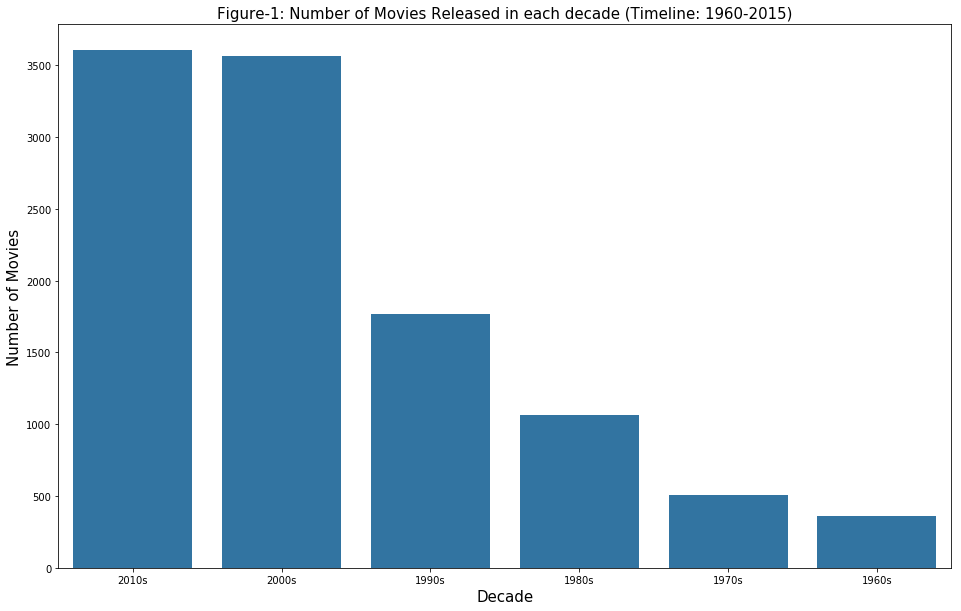

In [22]:
#plot numbe of Movies per decade
plt.figure(figsize = [16, 10])
sns.color_palette()
base_color = sns.color_palette()[0]
sns.countplot(data=df_movies, x='decade', color= base_color, order = decade_movie_index);
plt.title("Figure-1: Number of Movies Released in each decade (Timeline: 1960-2015)", fontsize=15)
plt.xlabel("Decade", fontsize=15)
plt.ylabel("Number of Movies", fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

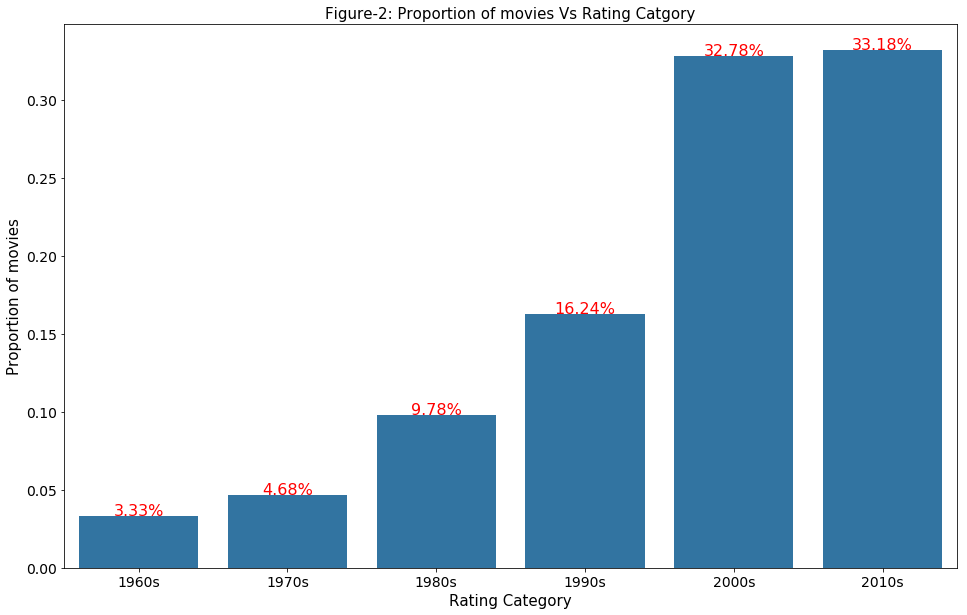

In [23]:
# Plot the percentage of released each decade
plt.figure(figsize = [16, 10])
n_points =  df_movies['decade'].value_counts().sum()
max_count = df_movies['decade'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_movies, x = 'decade', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion of movies', fontsize=15)
plt.xlabel('Rating Category', fontsize=15)
plt.title('Figure-2: Proportion of movies Vs Rating Catgory',fontsize=15)

# add annotations
cat_counts = df_movies['decade'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    plt.text(loc, count+9, pct_string, ha = 'center', color = 'R', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

### Note:  
It is important to note that during the 2010s the dataset contains 05 years data (2010-2015) while all others decades contains 10 years of duration. Hence, calculating the total number of movies, and proportion (percentage) is not a good representation. Therefore, we need to find the average number of movies per years which is the ratio of the total number of movies in a decade to the number of years in the decade. 

In [24]:
#Total number of years  per decade available in the dataset

df_yrs_1960s = df_movies.query('decade == "1960s"').groupby(['release_year'], as_index= False).count().release_year.count()
print ("Total Number of years during 1960s: {}".format(df_yrs_1960s))

df_yrs_1970s = df_movies.query('decade == "1970s"').groupby(['release_year'], as_index= False).count().release_year.count()
print ("Total Number of years during 1970s: {}".format(df_yrs_1970s))

df_yrs_1980s = df_movies.query('decade == "1980s"').groupby(['release_year'], as_index= False).count().release_year.count()
print ("Total Number of years during 1980s: {}".format(df_yrs_1970s))

df_yrs_1990s = df_movies.query('decade == "1990s"').groupby(['release_year'], as_index= False).count().release_year.count()
print ("Total Number of years during 1990s: {}".format(df_yrs_1970s))

#Total number of years in 2000s
df_yrs_2000s= df_movies.query('decade == "2000s"').groupby(['release_year'], as_index= False).count().release_year.count()
print ("Total Number of years during 2000s: {}".format(df_yrs_2000s))


#Total number of years in 2010s
df_yrs_2010s= df_movies.query('decade == "2010s"').groupby(['release_year'], as_index= False).count().release_year.count()
print ("Total Number of years during 2010s: {}".format(df_yrs_2010s))


Total Number of years during 1960s: 10
Total Number of years during 1970s: 10
Total Number of years during 1980s: 10
Total Number of years during 1990s: 10
Total Number of years during 2000s: 10
Total Number of years during 2010s: 6


In [25]:
# Count the number of movies per decade 
df_movies['decade'].value_counts()

2010s    3605
2000s    3562
1990s    1765
1980s    1063
1970s     508
1960s     362
Name: decade, dtype: int64

In [26]:
#Number of movie per years during 1960s-diving the total number of movie by number of years
movie_per_yr_1960s = df_movies['decade'].value_counts()[0]  /df_yrs_1960s
print ("Number of movie per years duing 1960s: {}".format(movie_per_yr_1960s))

#Number of movie per years during 1970s-diving the total number of movie by number of years
movie_per_yr_1970s = df_movies['decade'].value_counts()[1]/df_yrs_1970s
print ("Number of movie per years duing 1970s: {}".format(movie_per_yr_1970s))

#Number of movie per years during 1980s-diving the total number of movie by number of years
movie_per_yr_1980s = df_movies['decade'].value_counts()[2]/df_yrs_1980s
print ("Number of movie per years duing 1980s: {}".format(movie_per_yr_1980s))


#Number of movie per years during 1990s-diving the total number of movie by number of years
movie_per_yr_1990s = df_movies['decade'].value_counts()[3]/df_yrs_1990s
print ("Number of movie per years duing 1990s: {}".format(movie_per_yr_1990s))


#Number of movie per years during 2000s-diving the total number of movie by number of years
movie_per_yr_2000s = df_movies['decade'].value_counts()[4]/df_yrs_2000s
print ("Number of movie per years duing 2000s: {}".format(movie_per_yr_2000s))

#Number of movie per years during 2010s-diving the total number of movie by number of years
movie_per_yr_2010s = df_movies['decade'].value_counts()[5]/df_yrs_2010s
print ("Number of movie per years duing 2010s: {}".format(movie_per_yr_2010s))

Number of movie per years duing 1960s: 36.2
Number of movie per years duing 1970s: 50.8
Number of movie per years duing 1980s: 106.3
Number of movie per years duing 1990s: 176.5
Number of movie per years duing 2000s: 356.2
Number of movie per years duing 2010s: 600.8333333333334


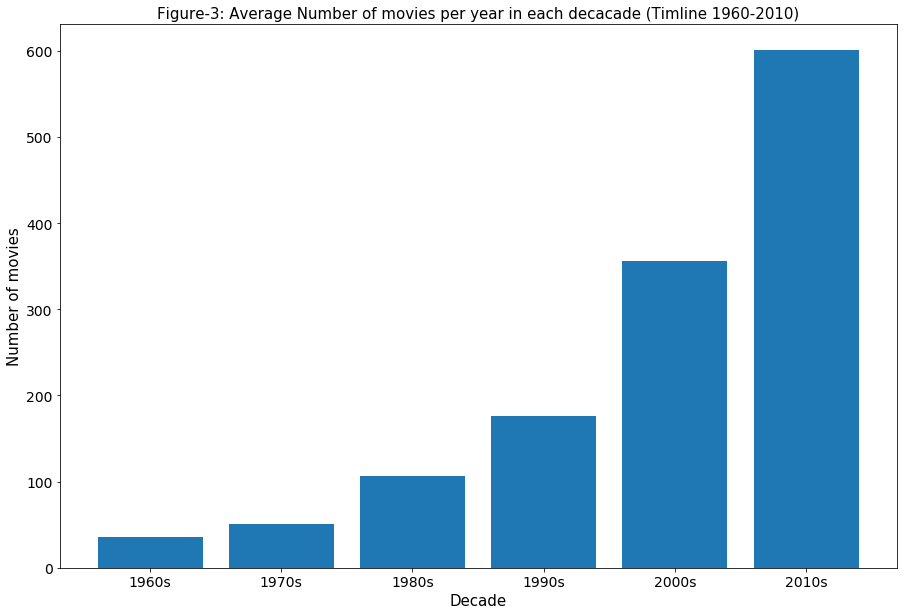

In [27]:
# plot the average number of movies per year in each decacade
plt.figure(figsize = [15, 10])
decades = [1960, 1970, 1980, 1990, 2000, 2010]
movies_per_yrs = [ 36.2, 50.8, 106.3, 176.5, 356.2, 600.83] 
plt.bar(["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"], movies_per_yrs)
plt.title("Figure-3: Average Number of movies per year in each decacade (Timline 1960-2010)",fontsize=15)
plt.xlabel("Decade", fontsize=15)
plt.ylabel("Number of movies",fontsize=15);
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

### 1-A) Conclusion


1) The highest number of movies are released during the 2010s and the number is 3605, closely followed by 3562 for the decade 2000s (See Figure 1) and a total of 66% per cent of the movies are released combining 2000s and 2010s (See Figure 1). 

However, as we calculate the number of  average movies per year in each decade, the 2010s dominates all the decades by a large margin (See Figure-3)

2) The lowest number of movies were released during the 1960-1969 which is 3.4% of all the movies (Figure-1 & 2)


### 1-B) Which decade has the highest average rating of the movies? 

In [28]:
# Grouping the data as per decade
df_popularity = df_movies.groupby(['decade'], as_index= False)['vote_average'].mean()

In [29]:
# ordering the decades interms of highest voting average 
df_popularity.nlargest(6, 'vote_average')

,decade,vote_average
1,1970s,6.367323
0,1960s,6.246133
2,1980s,6.079398
3,1990s,5.999263
4,2000s,5.921224
5,2010s,5.902996


### 1-B) Conclusion

1) Movies of the 70s have the highest average rating followed by the movies of 60s. However, these two years have much lower sample size as only a little above of 8% of the total movies of this dataset were released in these two decades combined. 

2) During 2000-2010 highest number of movies were produced but the decade has the lowest average rating.

### C) Which decade has the largest number of outliers in terms of average rating?

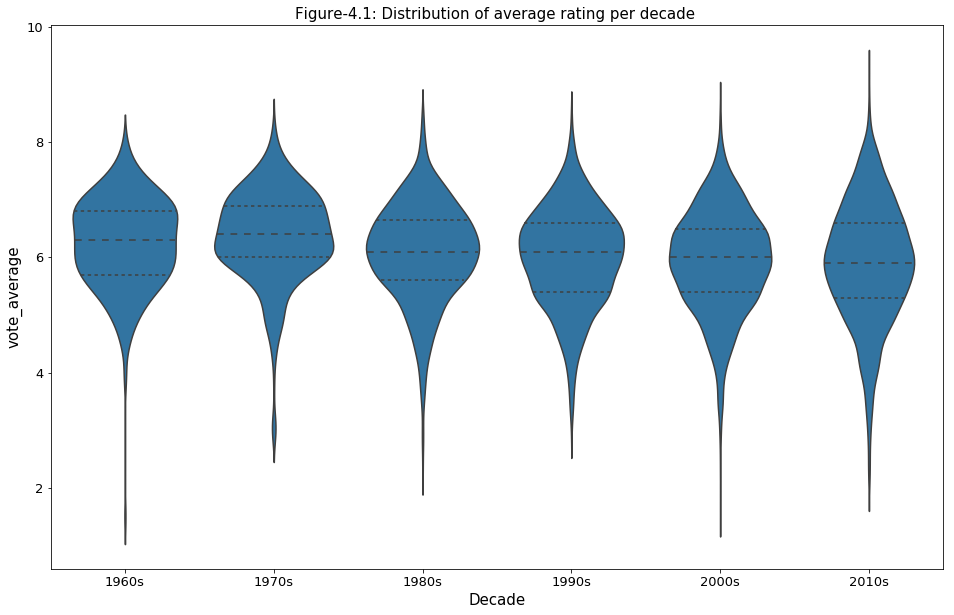

In [30]:
# Plotting the distribution of average rating Per Decad
plt.figure(figsize = [16, 10])
base_color = sns.color_palette()[0]
sns.violinplot(data = df_movies, x = 'decade', y = 'vote_average', color = base_color, inner = 'quartile')
plt.xlabel("Decade", fontsize=15)
plt.ylabel("vote_average",fontsize=15);
plt.title("Figure-4.1: Distribution of average rating per decade ", fontsize=15) 
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

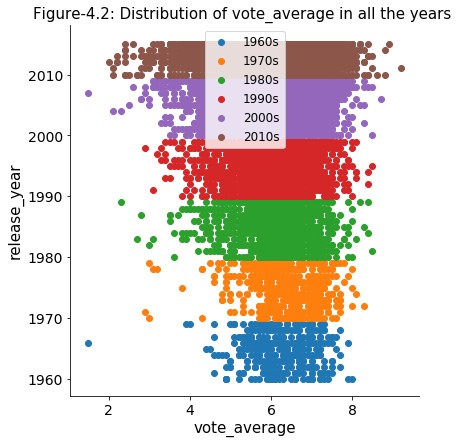

In [31]:
# plt vote_average, release_year and runtime distribution for the Top 500 movies
g = sns.FacetGrid(data = df_movies, hue = 'decade', size = 6)
g.map(plt.scatter, 'vote_average', 'release_year')
plt.xlabel("vote_average",fontsize=15);
plt.ylabel("release_year",fontsize=15);
plt.legend(loc=9,prop={'size':12})
plt.title("Figure-4.2: Distribution of vote_average in all the years ", fontsize=15) 
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

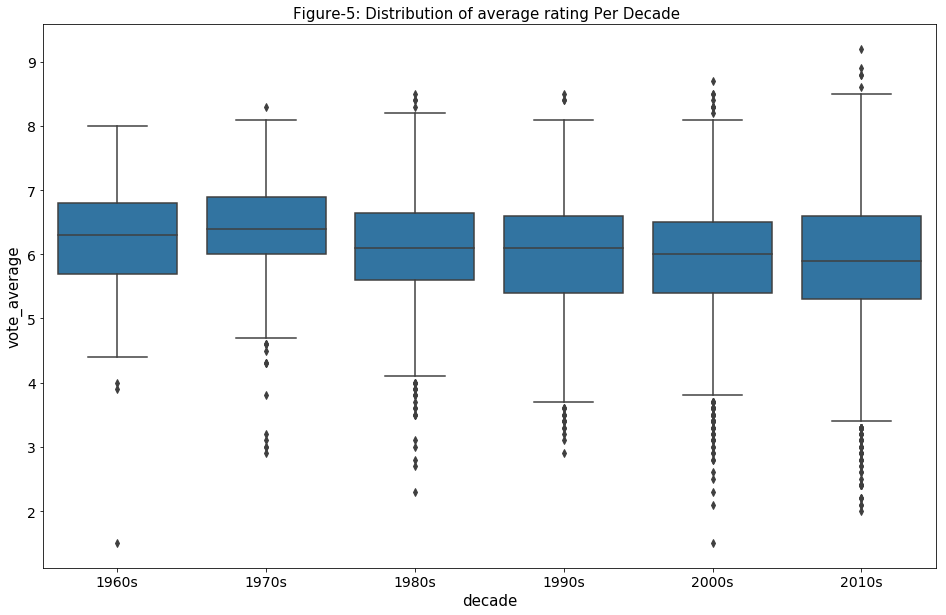

In [32]:
# Plotting the distribution of average rating Per Decad
plt.figure(figsize = [16, 10])
base_color = sns.color_palette()[0]
sns.boxplot(data = df_movies, x = 'decade', y = 'vote_average', color = base_color)
plt.title("Figure-5: Distribution of average rating Per Decade ", fontsize=15) 
plt.xlabel("decade",fontsize=15);
plt.ylabel("vote_average",fontsize=15);
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

### Note: The maximum vote_average is 9.2 and the minimum is 1.5. Let us find the movies with the maximum and minimum vote_average.

In [33]:
# find the movies with min vote_average
df_movies.query('vote_average == 1.5')

,budget,original_title,runtime,genres,vote_average,release_year,decade
7772,0,Transmorphers,86,Action|Adventure|Science Fiction,1.5,2007,2000s
10865,19000,Manos: The Hands of Fate,74,Horror,1.5,1966,1960s


In [34]:
# find the movie with max vote_average
df_movies.query('vote_average == 9.2')

,budget,original_title,runtime,genres,vote_average,release_year,decade
3894,0,The Story of Film: An Odyssey,900,Documentary,9.2,2011,2010s


### 1-C ) Conclusion:

1. 50 % of all the movies fall within the average rating of 5.4 to 6.6 as can be seen from the summary statistics. The violin curve in Figure-4 also confirm the summary statistics as the curve has the widest area for the average rating o 5.4 to 6.6.

 
2. From the violine curve of Figure-4.1, it can be observed that for the movies of the 60s and 70s the violin curve is wider compared to other decades. So, it can be concluded that most of the movies in these two decades have an average rating between 5.4 to 6.6 and that explains the higher average rating and it is also visible in Figure 4.2 as the movies of the 1960s are concentrated in 5.4 to 6.6 of the vote_average scale.


3. The decade of the 2000s has the largest number of outliers as can be seen from the boxplot at Figure-5. 


4. From Figure-4.2 and Figure-5 it can be seen that there are two instances of the lowest value of vote_average. After query we can see, the lowest vote_average is 1.5, and both 1960s and 2000s have one movie that has the lowest average rating. 


5. The highest average rating movie is also visible from the Figure-4.1(form extended tail at the top), Figure-4.2 (with the brown dot) and Figure-5(the topmost black dot) and it is in the 2010s and that has been confirmed by the queries.

### 1-D) What kind of movies Short, Medium and Long movies are highest in numbers?

### To answer this question some random movie categories have been created: 

**1. 01-10 minutes: very Short**

**2. 11-60 minutes: Short**

**3. 61-120 minutes: Medium**

**4. 121-180 minutes: Long**

**5. 181-900 minutes: Extra-Long**
    

In [35]:
#Number of movies with 0 runtime
df_movies.query('runtime==0').count().runtime

31

In [36]:
# Creates bin edges for runtime- this will exclude the 31 movies with 0 runtime as the bin edge starts at 0
bin_edges = [0, 10, 60, 120, 180, 900]

In [37]:
# Creates bin names based on the runtime
bin_names = ['Very-Short (1-10 min)','Short (10-60 min)', 'Medium (60-120 min)', 'Long (120-180 min)', 'Extra-long (180-900 min)']

In [38]:
# check the runtime category
df_movies.query('runtime==900').head(2)

,budget,original_title,runtime,genres,vote_average,release_year,decade
3894,0,The Story of Film: An Odyssey,900,Documentary,9.2,2011,2010s


In [39]:
# Creates decade_levels column based on the year of release
df_movies['runtime_category'] = pd.cut(df_movies['runtime'], bin_edges, labels = bin_names)

In [40]:
#Total number of movies based on runtime
df_movies['runtime_category'].value_counts()

Medium (60-120 min)         8943
Long (120-180 min)          1452
Short (10-60 min)            200
Extra-long (180-900 min)     128
Very-Short (1-10 min)        111
Name: runtime_category, dtype: int64

In [41]:
#Total number of movies based on runtime-- should return 10865-31 = 10834
df_movies['runtime_category'].value_counts().sum()

10834

In [42]:
# Observe the runtime_category
df_movies.head()

,budget,original_title,runtime,genres,vote_average,release_year,decade,runtime_category
0,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,2010s,Long (120-180 min)
1,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,2010s,Medium (60-120 min)
2,110000000,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,2010s,Medium (60-120 min)
3,200000000,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,2010s,Long (120-180 min)
4,190000000,Furious 7,137,Action|Crime|Thriller,7.3,2015,2010s,Long (120-180 min)


In [43]:
#Calculate the percantage of movies in different category
df_runtime_category_percentage = df_movies['runtime_category'].value_counts()/df_movies['runtime_category'].value_counts().sum()*100

In [44]:
 df_movies['runtime_category'].value_counts()

Medium (60-120 min)         8943
Long (120-180 min)          1452
Short (10-60 min)            200
Extra-long (180-900 min)     128
Very-Short (1-10 min)        111
Name: runtime_category, dtype: int64

In [45]:
#View the Calculated percantage of movies in different category
df_runtime_category_percentage

Medium (60-120 min)         82.545689
Long (120-180 min)          13.402252
Short (10-60 min)            1.846040
Extra-long (180-900 min)     1.181466
Very-Short (1-10 min)        1.024552
Name: runtime_category, dtype: float64

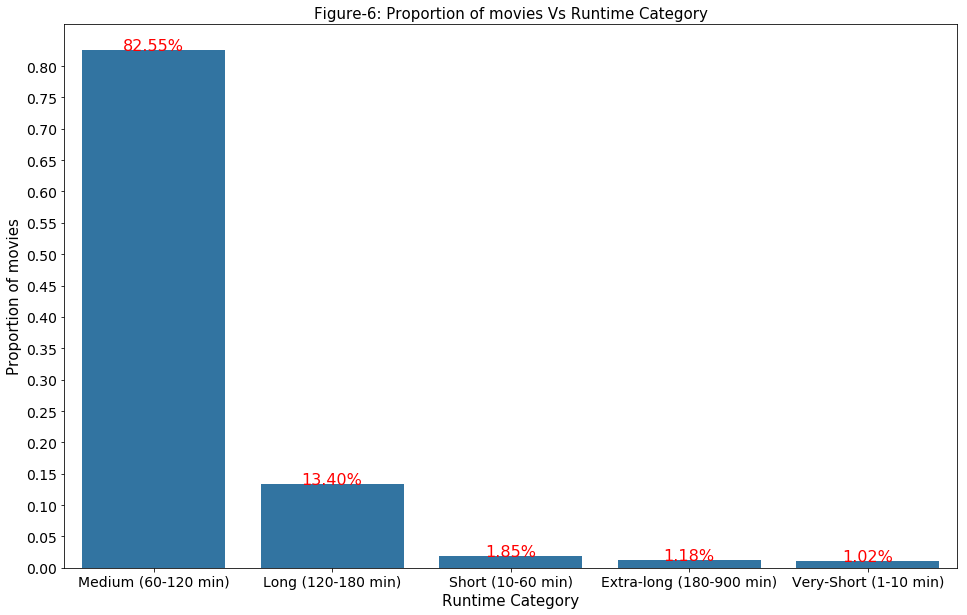

In [46]:
# Plot the percentage of released each decade
plt.figure(figsize = [16, 10])
n_points =  df_movies['runtime_category'].value_counts().sum()
max_count = df_movies['runtime_category'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_movies, x = 'runtime_category', color = base_color, order = df_movies['runtime_category'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion of movies', fontsize=15)
plt.xlabel('Runtime Category', fontsize=15)
plt.title('Figure-6: Proportion of movies Vs Runtime Category',fontsize=15)

# add annotations
cat_counts = df_movies['runtime_category'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'R', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [47]:
# Average rating per runtime category
vote_avg_runtime_category = df_movies.groupby(['runtime_category'], as_index= False).vote_average.mean()

In [48]:
# reset the index
vote_avg_runtime_category.reset_index(drop=True)

,runtime_category,vote_average
0,Very-Short (1-10 min),6.895495
1,Short (10-60 min),6.695500
2,Medium (60-120 min),5.856849
3,Long (120-180 min),6.470248
4,Extra-long (180-900 min),6.801563


In [49]:
#sorting the dataframe 
vote_avg_runtime_category.nlargest(6, 'vote_average')

,runtime_category,vote_average
0,Very-Short (1-10 min),6.895495
4,Extra-long (180-900 min),6.801563
1,Short (10-60 min),6.695500
3,Long (120-180 min),6.470248
2,Medium (60-120 min),5.856849


### 1-D) Conclusion
    

1) 82.54% of all the movies have a duration: 60-120 minutes (Figure-6)

2) Less than 4% movies have runtime shorter than 60 minutes and longer than 180 minutes

3) Very short movies and Extra-long movies are handful in numbers but these two cateegories have the highest vote_average. Medium length movies are the highest in numbers but ranks last when it comes to vote_average. 

### 2. Run Time: 
             

### 2- A) Find the movies with the Longest And Shortest Runtime

In [50]:
#movie with maximum runtime
df_movies['runtime'].max()

900

In [51]:
#The movie with the maximum runtime
df_movies.query('runtime == 900')

,budget,original_title,runtime,genres,vote_average,release_year,decade,runtime_category
3894,0,The Story of Film: An Odyssey,900,Documentary,9.2,2011,2010s,Extra-long (180-900 min)


In [52]:
#movie with minimumm runtime
df_movies['runtime'].min()

0

### Runtime of the movies cannot be 0. Hence, we take out the movies with 0 runtime form the dataset.

In [53]:
# Finding the movies with nonzero runtime 
df_nonzero_runtime = df_movies[df_movies['runtime']!=0]

In [54]:
# Finding the shortest movies with nonzero runtime 
df_nonzero_runtime['runtime'].min()

2

In [55]:
# Finding the shortest movies with nonzero runtime 
df_movies.query('runtime == 2')

,budget,original_title,runtime,genres,vote_average,release_year,decade,runtime_category
4883,0,Fresh Guacamole,2,Animation,7.9,2012,2010s,Very-Short (1-10 min)
4890,0,Cousin Ben Troop Screening,2,NaN,7.0,2012,2010s,Very-Short (1-10 min)
7905,0,The Adventures of AndrÃ© and Wally B.,2,Animation,5.3,1984,1980s,Very-Short (1-10 min)
10550,0,Luxo Jr.,2,Animation|Family,7.3,1986,1980s,Very-Short (1-10 min)
10754,0,Bambi Meets Godzilla,2,Animation|Comedy,5.6,1969,1960s,Very-Short (1-10 min)


### 2-A) Conclusion


1) The Longest movie: The Story of Film: An Odyssey has a duration of 900 minutes

2) The shortest movies: 05 movies have the shortest runtime of 02 minutes as can be seen above

### 2-B) Which decade has the highest and which decade has the lowest average runtime for the movies?

In [33]:
#Average Runtime per decade
df_avg_runtime =  df_movies.groupby(['decade']).mean().runtime

In [34]:
#Values of Average Runtime per decade
df_avg_runtime.reset_index()

,decade,runtime
0,1960s,111.417127
1,1970s,107.799213
2,1980s,104.331138
3,1990s,106.619263
4,2000s,102.080573
5,2010s,97.424965


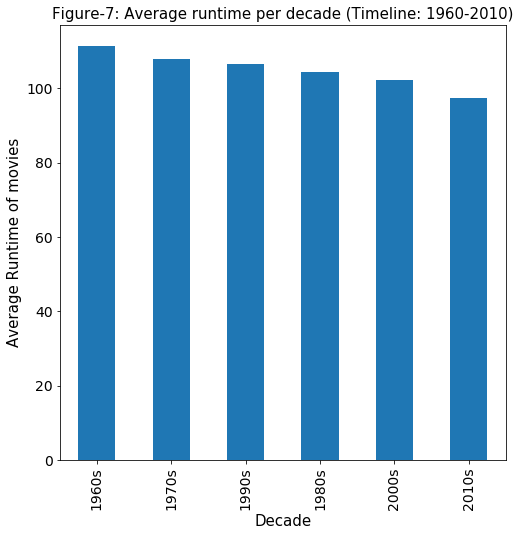

In [39]:
# plotting average runtime of movies
plt.figure(figsize = [8, 8])
df_avg_runtime.sort_values(ascending=False).plot.bar(color = base_color)
plt.xlabel("Decade", fontsize=15)
plt.ylabel("Average Runtime of movies",fontsize=15)
plt.title('Figure-7: Average runtime per decade (Timeline: 1960-2010)',fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

### 2-B) Conclusion:

1) Movies made during 1960-1970 has the highest average runtime although the number of movies is a lot less compared to the movies made between 2000-2010 and 2010-2015

2) Movies made during 2010-2015 has the lowest average runtime

3) The average duration has a decreasing trend over time as can be seen from Figure-7

### 2-C) Show the distribution of runtime for each movie category 

In [59]:
df_very_short_runtime = df_movies.query('runtime_category == "Very-Short (1-10 min)"')

In [60]:
#Summary statistics for movies with  Very-Short runtime
df_very_short_runtime.describe().runtime

count    111.000000
mean       5.783784
std        2.068840
min        2.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: runtime, dtype: float64

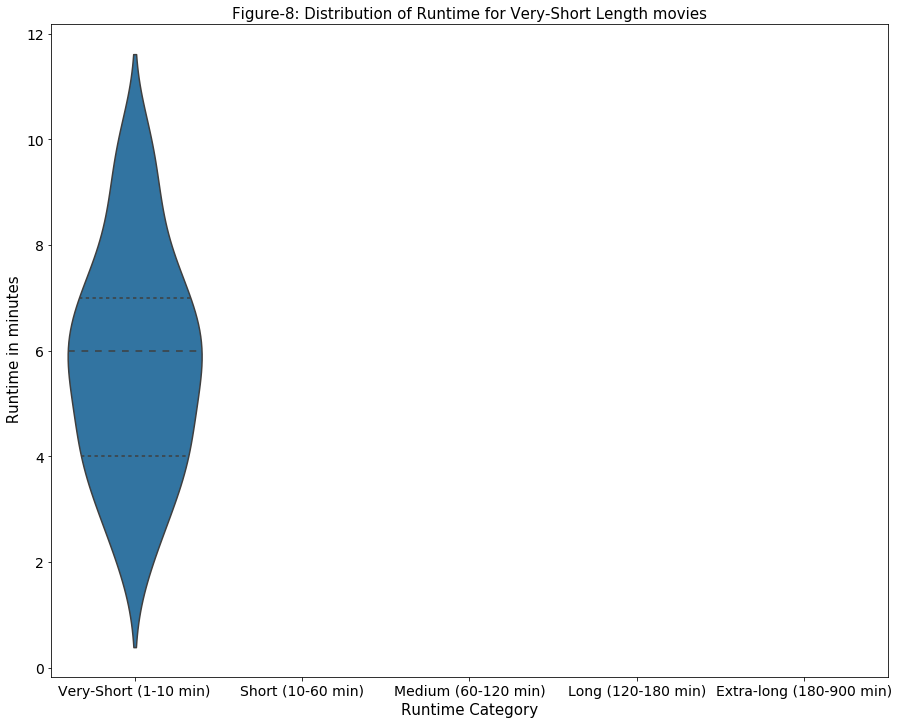

In [61]:
# Plot Run time for short movies
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]
sns.violinplot(data = df_very_short_runtime, x = 'runtime_category', y = 'runtime', color = base_color, inner = 'quartile')
plt.title("Figure-8: Distribution of Runtime for Very-Short Length movies",fontsize=15)
plt.ylabel(" Runtime in minutes", fontsize=15)
plt.xlabel("Runtime Category",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [62]:
# Movies with Short runtime
df_short_runtime = df_movies.query('runtime_category == "Short (10-60 min)"')

In [63]:
# Summary statistics for Movies with Short runtime
df_short_runtime.describe().runtime

count    200.000000
mean      35.830000
std       16.715205
min       11.000000
25%       22.000000
50%       31.500000
75%       52.000000
max       60.000000
Name: runtime, dtype: float64

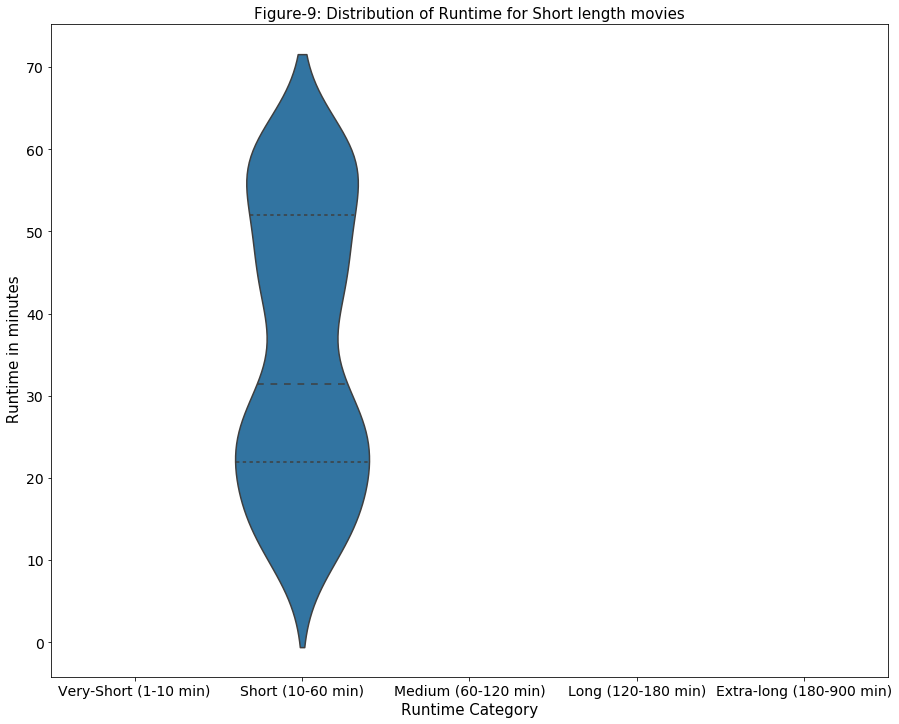

In [64]:
# Plot Run time for short movies
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]
sns.violinplot(data = df_short_runtime, x = 'runtime_category', y = 'runtime', color = base_color, inner = 'quartile')
plt.title("Figure-9: Distribution of Runtime for Short length movies", fontsize=15)
plt.ylabel(" Runtime in minutes", fontsize=15)
plt.xlabel("Runtime Category",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [65]:
# Summary statistics for Movies with Medium runtime
df_medium_runtime = df_movies.query('runtime_category == "Medium (60-120 min)"')

In [66]:
#Summary statistics for Movies with Medium runtime
df_medium_runtime.describe().runtime

count    8943.000000
mean       97.398524
std        11.096876
min        61.000000
25%        90.000000
50%        97.000000
75%       105.000000
max       120.000000
Name: runtime, dtype: float64

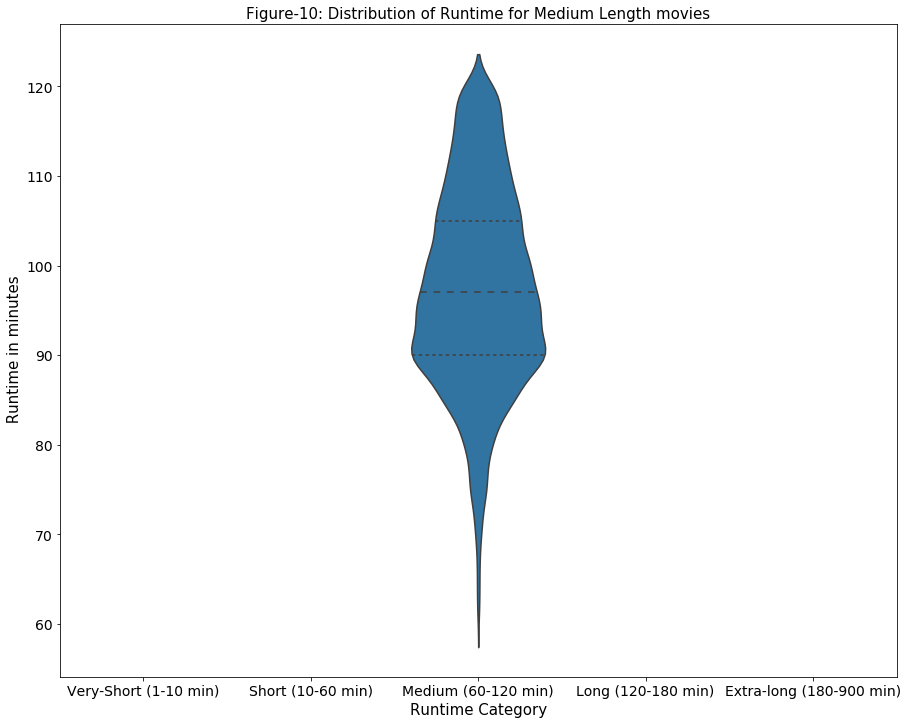

In [67]:
# Plot Run time for Medium length movies
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]
sns.violinplot(data = df_medium_runtime, x = 'runtime_category', y = 'runtime', color = base_color, inner = 'quartile',)
plt.title("Figure-10: Distribution of Runtime for Medium Length movies", fontsize=15)
plt.ylabel(" Runtime in minutes", fontsize=15)
plt.xlabel("Runtime Category",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [68]:
# Movies with Long runtime
df_long_runtime = df_movies.query('runtime_category == "Long (120-180 min)"')

In [69]:
#Summary statistics for Movies with Long runtime
df_long_runtime.describe().runtime

count    1452.000000
mean      135.657025
std        14.344660
min       121.000000
25%       125.000000
50%       131.000000
75%       141.000000
max       180.000000
Name: runtime, dtype: float64

Text(0.5,0,'Runtime Category')

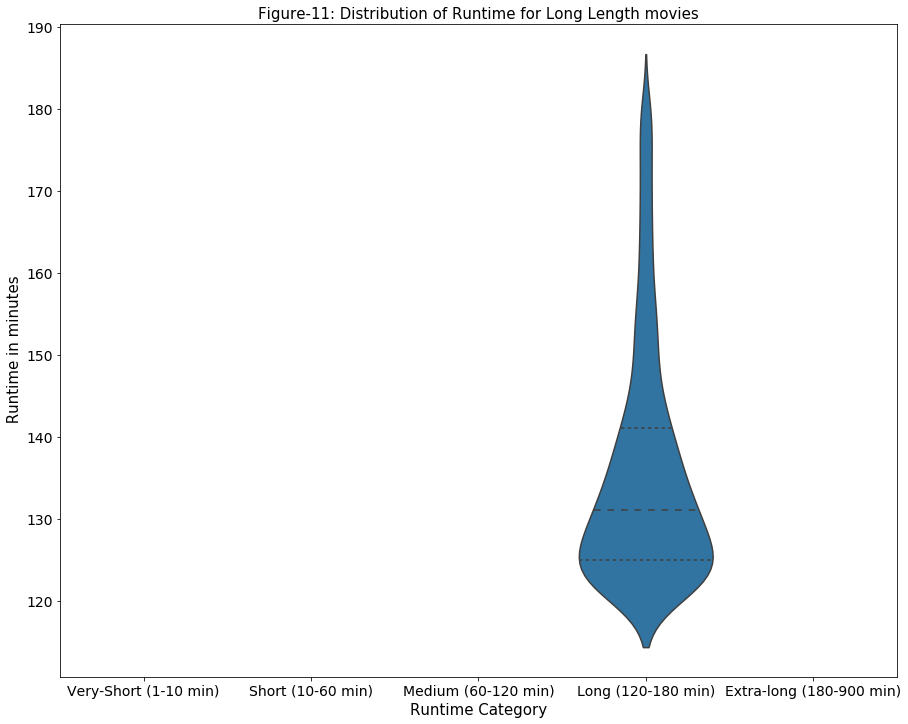

In [70]:
# Plot Run time for Long duration movies
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]
sns.violinplot(data = df_long_runtime, x = 'runtime_category', y = 'runtime', color = base_color, inner = 'quartile')
plt.title("Figure-11: Distribution of Runtime for Long Length movies",fontsize=15)
plt.ylabel(" Runtime in minutes", fontsize=15)
plt.xlabel("Runtime Category",fontsize=15)

In [71]:
# Runtime for Extra-Long length movies
df_extra_long_runtime = df_movies.query('runtime_category == "Extra-long (180-900 min)"')

In [72]:
# Summary statistics for Extra-Long length movies
df_extra_long_runtime.describe().runtime

count    128.000000
mean     259.320312
std      125.992747
min      181.000000
25%      187.750000
50%      209.000000
75%      260.250000
max      900.000000
Name: runtime, dtype: float64

Text(0.5,0,'Runtime Category')

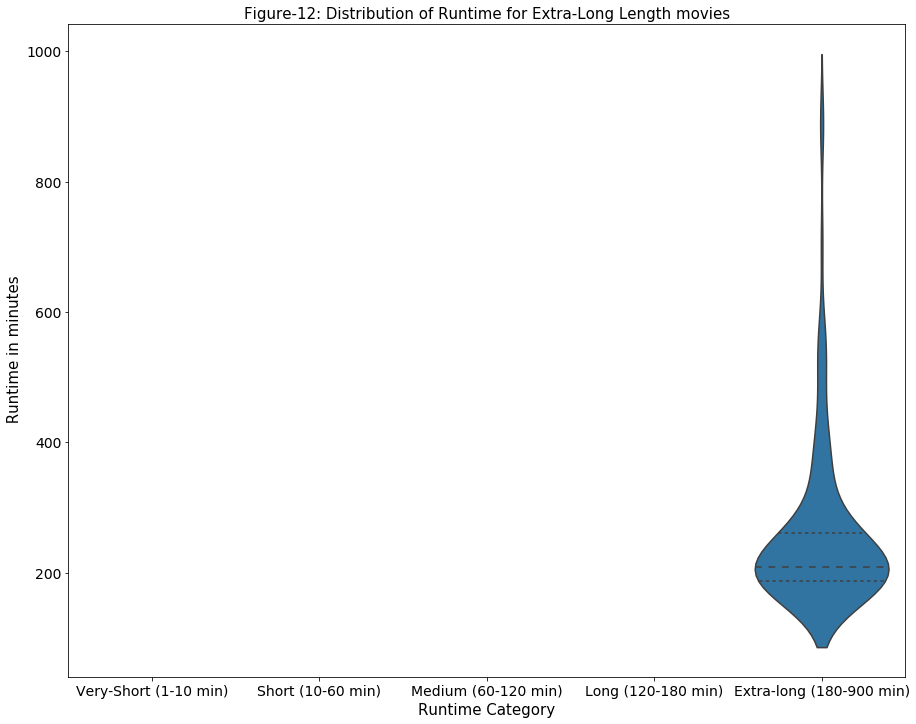

In [73]:
# Plot Run time for Extra-Long movies
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]
sns.violinplot(data = df_extra_long_runtime, x = 'runtime_category', y = 'runtime', color = base_color, inner = 'quartile')
plt.title("Figure-12: Distribution of Runtime for Extra-Long Length movies",fontsize=15)
plt.ylabel(" Runtime in minutes", fontsize=15)
plt.xlabel("Runtime Category",fontsize=15)

### 2-C) Conclusion:

The larger concentration of the movies is indicated by the widest region of the violin curves (Figure 8-12). From the summary statistics, we can see 25-75% percentiles and get an idea of the time distribution of the movies.

Figure 8: shows 50% of the Very-Short movies have a runtime between 4-7 minutes

Figure 9: shows 50% of Short movies have a runtime between 22-52 minutes

Figure 10: shows 50% of Medium Length  movies have a runtime between 90-105 minutes

Figure 11: shows 50% of Long Length  movies have a runtime between 125-141 minutes

Figure 12: shows 50% of Extra-Long Length movies have a runtime between 187-260 minutes




### 2-D) Which is the largest runtime category (Short, medium and long) comparing all the decades?
                                                         

Text(0.5,0,'Runtime Category')

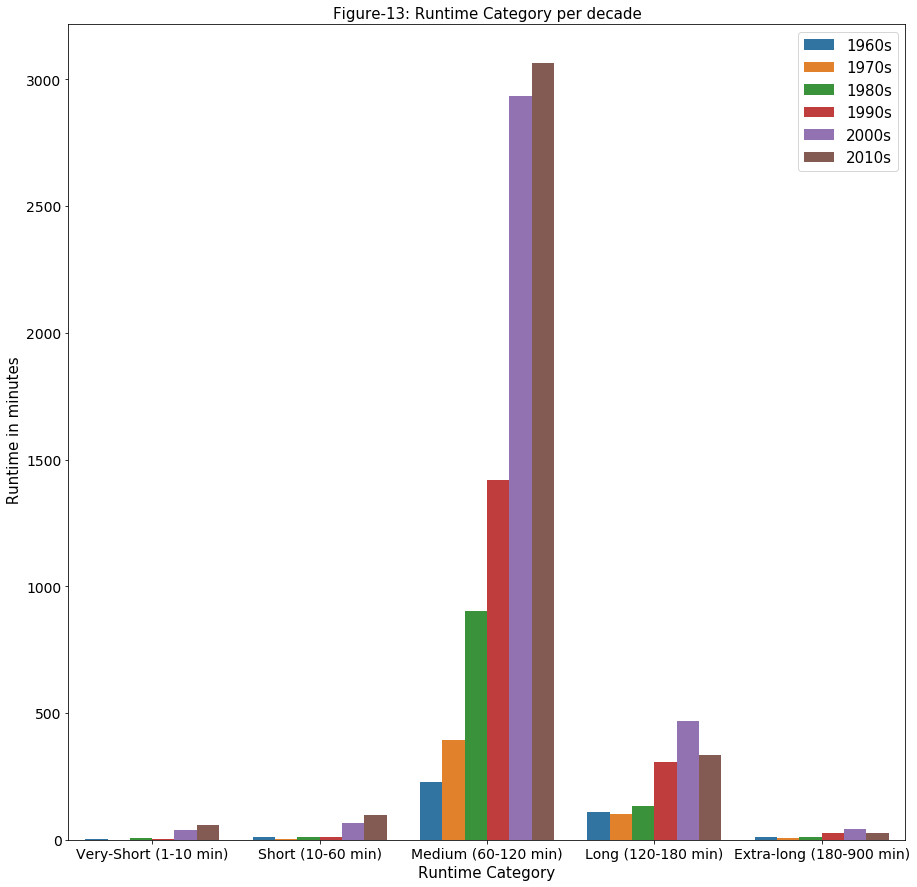

In [74]:
#Plotting Run time category comparing all the decades 
plt.figure(figsize = [15, 15])
sns.countplot(data = df_movies, x = 'runtime_category', hue = 'decade' )
plt.xlabel("Decade",fontsize=15)
plt.ylabel("Number of of movies",fontsize=15)
plt.title("Figure-13: Runtime Category per decade",fontsize=15)
plt.legend(loc=1,prop={'size':15})
plt.ylabel(" Runtime in minutes", fontsize=15)
plt.xlabel("Runtime Category",fontsize=15)

### 2-D) Conclusion:

During 2000-2010 highest number of Medium length movies (duration 60-120 minutes) were produced and this is the largest runtime category as can be seen from Figure-13.